# Libraries and Data

In [20]:
import face_recognition
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv('E:/Face_2_BMI_Estimation_Project/Data/all_celeb/data.csv')

In [22]:
data.head(10)

,image,height,weight,BMI
0,m_001,1.85,80,23.374726
1,m_002,1.85,81,23.666910
2,m_003,1.84,79,23.334121
3,m_004,1.85,80,23.374726
4,m_005,1.85,80,23.374726
5,m_006,1.86,80,23.124061
6,m_007,1.84,81,23.924858
7,m_008,1.86,80,23.124061
8,m_009,1.85,79,23.082542
9,m_010,1.84,82,24.220227


In [23]:
data_male=data[:405]
data_female=data[405:]

In [24]:
data_male.head(10)
#print(data_male)

,image,height,weight,BMI
0,m_001,1.85,80,23.374726
1,m_002,1.85,81,23.666910
2,m_003,1.84,79,23.334121
3,m_004,1.85,80,23.374726
4,m_005,1.85,80,23.374726
5,m_006,1.86,80,23.124061
6,m_007,1.84,81,23.924858
7,m_008,1.86,80,23.124061
8,m_009,1.85,79,23.082542
9,m_010,1.84,82,24.220227


In [25]:
data_female.head(10)
#print(data_female)

,image,height,weight,BMI
405,f_001,1.54,55,23.191095
406,f_002,1.55,55,22.892820
407,f_003,1.56,55,22.600263
408,f_004,1.55,55,22.892820
409,f_005,1.54,56,23.612751
410,f_006,1.55,56,23.309053
411,f_007,1.56,56,23.011177
412,f_008,1.54,54,22.769438
413,f_009,1.55,54,22.476587
414,f_010,1.56,54,22.189349


# EDA

Female Data Distribution

Text(0.5, 0, 'Height(m)')

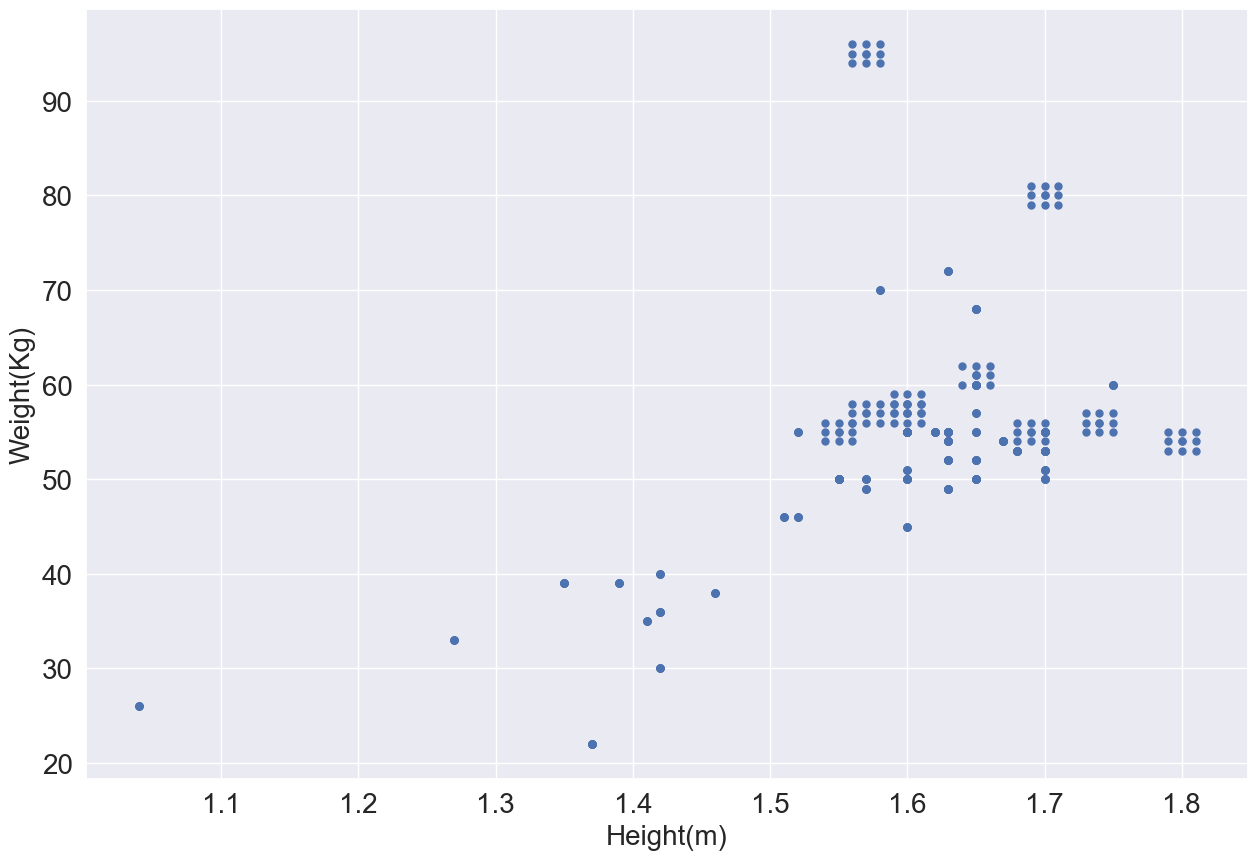

In [26]:
sns.set()
female_plot=data_female.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False,fontsize=20)
female_plot.set_ylabel('Weight(Kg)',fontsize=20)
female_plot.set_xlabel('Height(m)',fontsize=20)

In [27]:
print('Average Height = ' + str(round(data_female['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_female['weight'].mean(), 2)) + 'kg')

Average Height = 1.6m, Average Weight = 53.21kg


Text(0.5, 0, 'Height(m)')

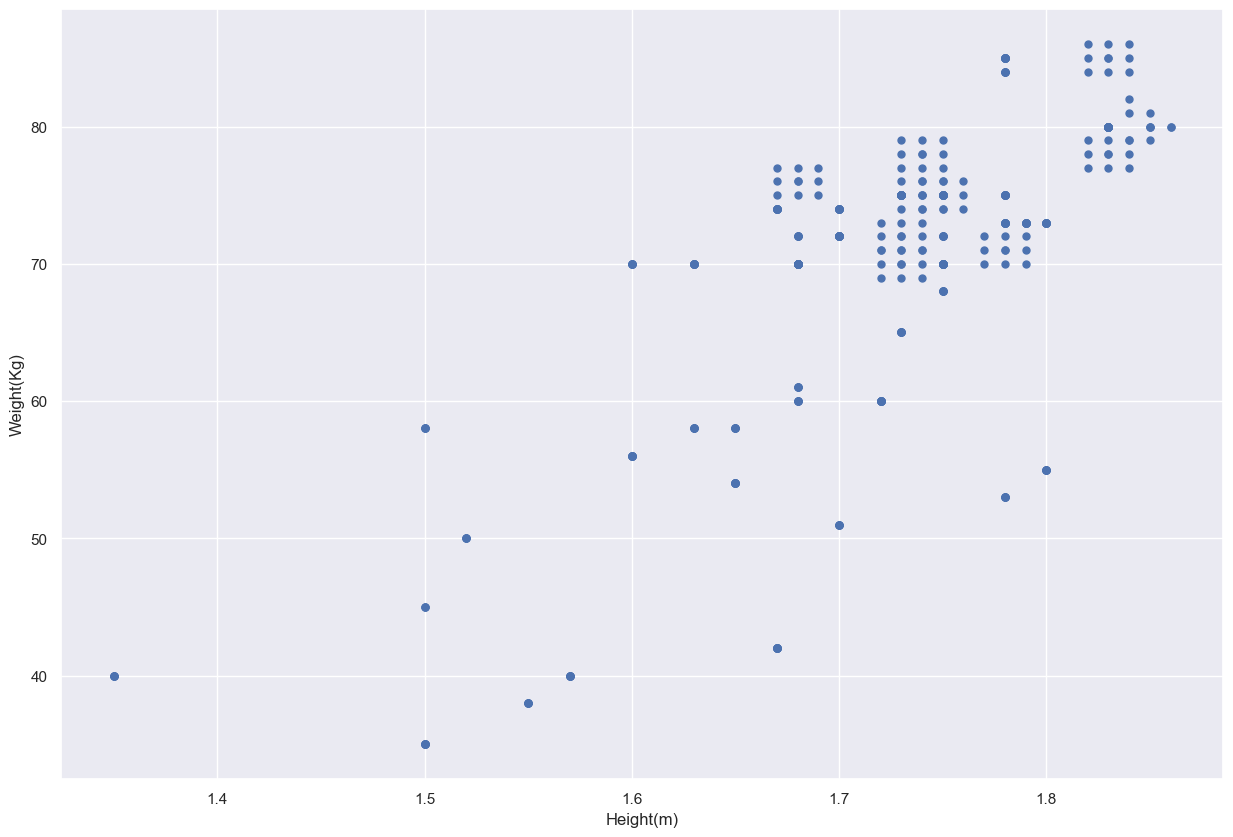

In [28]:
sns.set()
male_plot=data_male.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=5, legend=False)
male_plot.set_ylabel('Weight(Kg)')
male_plot.set_xlabel('Height(m)')

In [29]:
print('Average Height = ' + str(round(data_male['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(data_male['weight'].mean(), 2)) + 'kg')

Average Height = 1.71m, Average Weight = 68.34kg


In [30]:
def bmi_classification(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif (bmi >= 18.5) and (bmi < 25):
        return 'Normal'
    elif (bmi >= 25) and (bmi < 30):
        return 'Overweight'
    elif (bmi >= 30) and (bmi < 35):
        return 'Moderately obese'
    elif (bmi >= 35) and (bmi < 40):
        return 'Severely obese'
    else:
        return 'Very severely obese'

In [31]:
data['class'] = data['BMI'].apply(bmi_classification)
data['class'].value_counts()

Normal            562
Underweight       143
Overweight        128
Severely obese     10
Name: class, dtype: int64

# Feature Extraction

In [32]:
def encode_image(image_path):
    try:
        image=face_recognition.load_image_file(image_path)
    except FileNotFoundError:
        print("File Not Found at: " + image_path)
        return np.zeros(128).tolist()
    face_encoding=face_recognition.face_encodings(image)
    if not face_encoding:
        print("No Face Found at " + image_path)
        return np.zeros(128).tolist()
    return face_encoding[0].tolist()

face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/m_196.jpeg")
print(face_encoding)

[-0.11874952912330627, 0.07509653270244598, 0.06497760862112045, -0.030680926516652107, 0.0025138333439826965, -0.06355699896812439, 0.0041218288242816925, -0.06322014331817627, 0.16231685876846313, -0.06845717132091522, 0.17045773565769196, -0.014900836162269115, -0.24975158274173737, -0.1522819548845291, -0.05267084762454033, 0.04667552933096886, -0.07816243171691895, -0.1917405128479004, -0.1033046692609787, -0.0988754853606224, 0.08231477439403534, 0.034927286207675934, -0.03550256788730621, -0.02420385554432869, -0.2133110761642456, -0.34558600187301636, -0.09912428259849548, -0.06624619662761688, 0.024033715948462486, -0.12841752171516418, 0.03465218096971512, -0.017105326056480408, -0.1942625790834427, -0.05183762311935425, -0.014805512502789497, 0.1286012828350067, 0.045917343348264694, -0.01689842715859413, 0.21852022409439087, -0.02775605581700802, -0.1479705572128296, -0.03250345587730408, 0.0398452952504158, 0.25728705525398254, 0.13387556374073029, -0.0043458291329443455, 

converting all images to face encoding

In [33]:
import os
face_data=[]
for image_name in data.image:
    if os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg")
        face_data.append(face_encoding)
    elif os.path.exists("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png"):
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png")
        face_data.append(face_encoding)

    '''try:
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpg")
        face_data.append(face_encoding)
        #continue
    except:
        pass
    try:
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".jpeg")
        face_data.append(face_encoding)
        #continue
    except:
        pass
    try:
        face_encoding=encode_image("E:/Face_2_BMI_Estimation_Project/Data/all_celeb/images/" + image_name + ".png")
        face_data.append(face_encoding)
        #continue
    except:
        pass'''

In [34]:
print(len(face_data),len(face_data[0]))
with open('readme.txt', 'w') as f:
    for i in range(len(face_data)):
        y = [str(abs(x)) for x in face_data[i]]
        f.write((str(i+1)+" bhavs".join(y)))
        f.write('\n\n\n')

843 128


In [35]:
X=np.array(face_data)
y_height=data.height.values
y_weight=data.weight.values
y_BMI=data.BMI.values
plotX=pd.DataFrame(X)

Dimensionality Reduction using PCA

[0.15951045 0.09804915]


Text(0.5, 0, 'PCA 2')

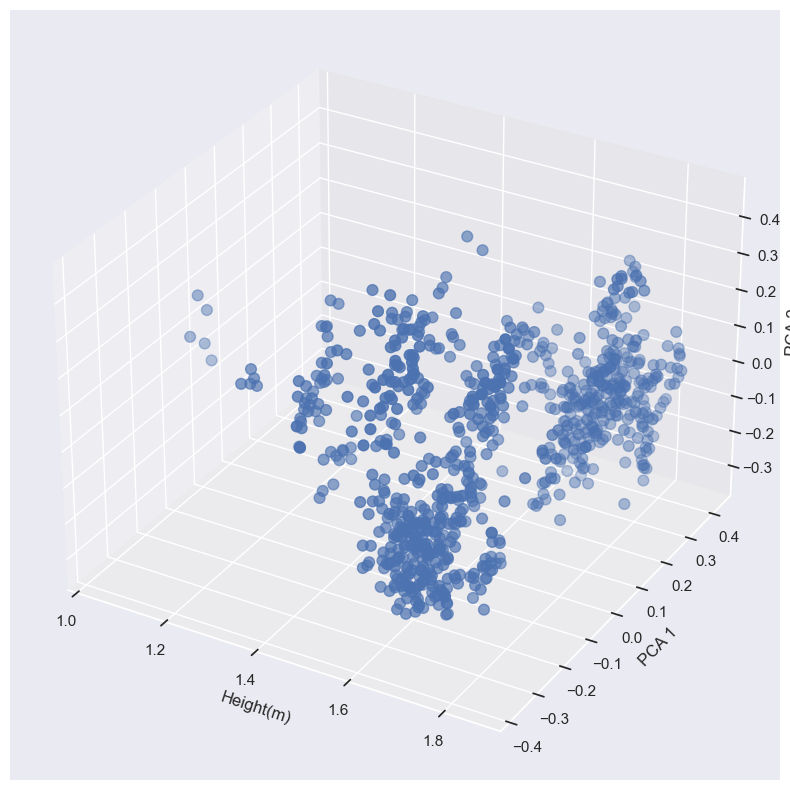

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(plotX)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca1 = principalDf['principal component 1'].tolist()
pca2 = principalDf['principal component 2'].tolist()
sns.set()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_height, pca1, pca2, s=60)
ax.set_xlabel('Height(m)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)

Text(0.5, 0, 'PCA 2')

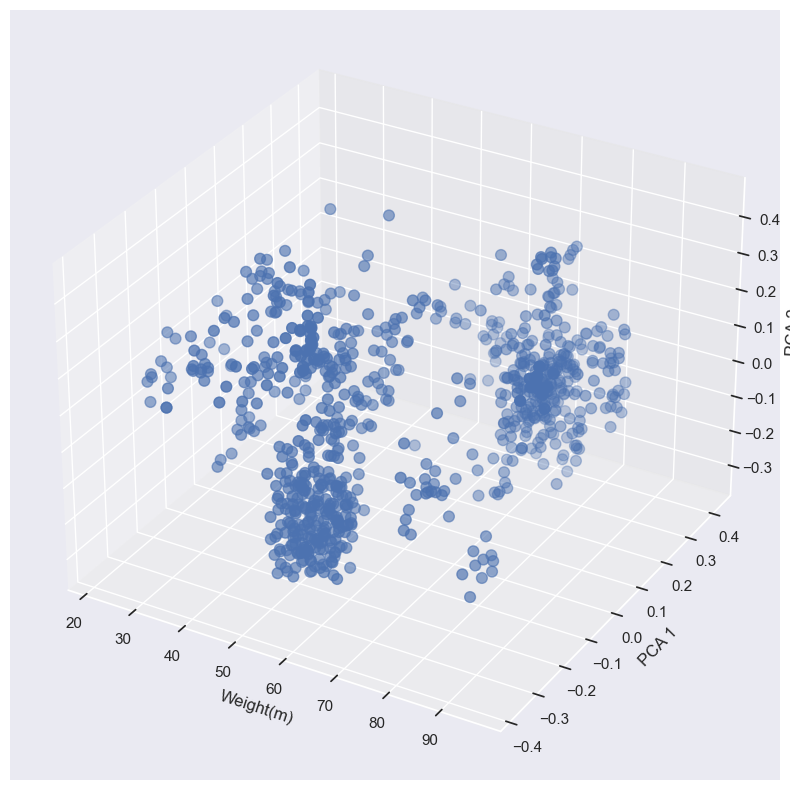

In [37]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_weight, pca1, pca2, s=60)
ax.set_xlabel('Weight(m)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)

# Model Creation

Spliting Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test, y_BMI_train, y_BMI_test = train_test_split(X, y_height, y_weight, y_BMI, random_state=1)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def report_goodness(model, X_test, y_test, predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test

    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [40]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import  linear_model
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import joblib

## Simple Linear Regression

In [41]:
#Height Estimation
model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.64
Model Performance
Average Error: 0.0352 degrees.
Accuracy = 82.21%.


In [42]:
#Weight Estimation
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_height,X_test,y_weight_test)

Mean squared error: 12.74
Variance score: -171.82
Model Performance
Average Error: 3.5628 degrees.
Accuracy = 12.30%.


In [43]:
#BMI Estimation
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))
report_goodness(model_height,X_test,y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/linear_bmi_predictor1.model'
joblib.dump(model_BMI, bmi_model)

Mean squared error: 6.66
Variance score: -241.55
Model Performance
Average Error: 2.5762 degrees.
Accuracy = 16.29%.


['E:/Face_2_BMI_Estimation_Project/models/linear_bmi_predictor1.model']

## Ridge Linear Regression

In [44]:
#Estimating Height

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_height = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.61
Model Performance
Average Error: 0.0373 degrees.
Accuracy = 81.35%.


In [45]:
#Estimating Weight
model_weight = make_pipeline(StandardScaler(with_mean=False), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_weight = model_weight.fit(X_train,np.log(y_weight_train))
report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.02
Variance score: 0.73
Model Performance
Average Error: 0.1064 degrees.
Accuracy = 97.27%.


In [46]:
#Estimating BMI
model_BMI = make_pipeline(StandardScaler(with_mean=True), Ridge(fit_intercept=True, alpha=0.0015, random_state=4))
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/ridge_bmi_predictor1.model'
joblib.dump(model_BMI, bmi_model)

Mean squared error: 0.01
Variance score: 0.54
Model Performance
Average Error: 0.0878 degrees.
Accuracy = 97.11%.


['E:/Face_2_BMI_Estimation_Project/models/ridge_bmi_predictor1.model']

## Random Forest Regressor

In [47]:
model_height = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.01
Variance score: 0.35
Model Performance
Average Error: 0.0450 degrees.
Accuracy = 76.80%.


In [48]:
#With Hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [49]:
rf_height_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_height_model.fit(X_train,np.log(y_height_train))
report_goodness(rf_height_model, X_test, y_height_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mean squared error: 0.00
Variance score: 0.63
Model Performance
Average Error: 0.0299 degrees.
Accuracy = 81.90%.


In [50]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.04
Variance score: 0.52
Model Performance
Average Error: 0.1207 degrees.
Accuracy = 96.86%.


In [51]:
rf_weight_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_weight_model.fit(X_train,np.log(y_weight_train))
report_goodness(rf_weight_model,X_test,y_weight_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mean squared error: 0.02
Variance score: 0.74
Model Performance
Average Error: 0.0817 degrees.
Accuracy = 97.84%.


In [52]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.02
Variance score: 0.34
Model Performance
Average Error: 0.0960 degrees.
Accuracy = 96.83%.


In [53]:
rf_BMI_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_BMI_model.fit(X_train,np.log(y_BMI_train))
report_goodness(rf_BMI_model, X_test, y_BMI_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mean squared error: 0.01
Variance score: 0.72
Model Performance
Average Error: 0.0612 degrees.
Accuracy = 97.97%.


## Kernal Ridge Regression

In [54]:
model_height_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_height_kridge = model_height_kridge.fit(X_train, np.log(y_height_train))
report_goodness(model_height_kridge, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.82
Model Performance
Average Error: 0.0224 degrees.
Accuracy = 87.48%.


In [55]:
model_weight_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_weight_kridge = model_weight_kridge.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight_kridge, X_test, y_weight_test)

Mean squared error: 0.01
Variance score: 0.85
Model Performance
Average Error: 0.0717 degrees.
Accuracy = 98.14%.


In [56]:
model_BMI_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_BMI_kridge = model_BMI_kridge.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI_kridge, X_test, y_BMI_test)

#saving model
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/kernal_ridge_bmi_predictor1.model'
joblib.dump(model_BMI_kridge, bmi_model)

Mean squared error: 0.00
Variance score: 0.83
Model Performance
Average Error: 0.0519 degrees.
Accuracy = 98.29%.


['E:/Face_2_BMI_Estimation_Project/models/kernal_ridge_bmi_predictor1.model']

## SVR

In [57]:
from sklearn.svm import SVR

model_height=SVR(kernel='rbf')
model_height=model_height.fit(X_train, np.log(y_height_train) )
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.50
Model Performance
Average Error: 0.0502 degrees.
Accuracy = 80.36%.


In [58]:
model_weight=SVR(kernel='rbf')
model_weight=model_weight.fit(X_train, np.log(y_weight_train) )
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.02
Variance score: 0.78
Model Performance
Average Error: 0.0872 degrees.
Accuracy = 97.73%.


In [59]:
model_BMI=SVR(kernel='rbf')
model_BMI=model_BMI.fit(X_train, np.log(y_BMI_train) )
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.01
Variance score: 0.65
Model Performance
Average Error: 0.0774 degrees.
Accuracy = 97.46%.


In [60]:
import joblib
height_model = 'E:/Face_2_BMI_Estimation_Project/models/rf_height_predictor1.model'
weight_model = 'E:/Face_2_BMI_Estimation_Project/models/rf_weight_predictor1.model'
bmi_model = 'E:/Face_2_BMI_Estimation_Project/models/rf_bmi_predictor1.model'
joblib.dump(rf_height_model, height_model)
joblib.dump(rf_weight_model, weight_model)
joblib.dump(rf_BMI_model, bmi_model)

['E:/Face_2_BMI_Estimation_Project/models/rf_bmi_predictor1.model']

In [61]:
#load model from disk
import joblib
height_model = joblib.load(height_model)
weight_model = joblib.load(weight_model)
bmi_model = joblib.load(bmi_model)

In [62]:
def predict_height_width_BMI(test_image,height_model,weight_model,bmi_model):
    test_array = np.expand_dims(np.array(encode_image(test_image)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = np.ndarray.item(np.exp(bmi_model.predict(test_array)))
    return {'height':height,'weight':weight,'bmi':bmi}
    

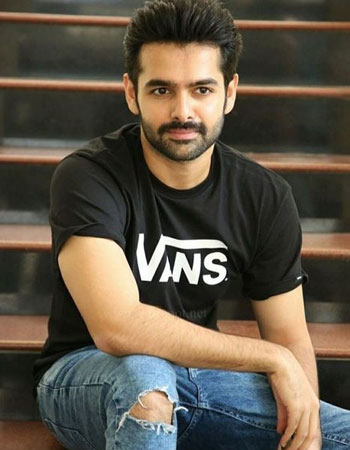

In [63]:
from IPython.display import Image
test_image= 'E:/Face_2_BMI_Estimation_Project/Data/Test/ram2.jpg' 
Image(test_image)

In [64]:
predict_height_width_BMI(test_image,height_model,weight_model,bmi_model)

{'height': 1.7309969519331603,
 'weight': 72.65670030279001,
 'bmi': 24.565772924744167}

| Model  | Height Accuracy | Weight Accuracy | BMI Accuracy | 
| --- | --- | --- | --- |
| Linear Regression | 95.49% | 12.65% | 17.05% |
| Ridge Linear Regression | 96.92% | 98.95% | 98.52% |
| Random Forest Regression | 95.81% | 98.37% | 97.10% |
| Kernel Ridge Regression | 97.76% | 99.01% | 98.73% |
| Support Vector Regression | 91.53% | 98.32% | 97.91% |